## PREDICT QUALITY OF WINE BASES ON DATA


Mutli class classification. No grandi problemi.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('winequality-red.csv')          # Import Dataset from .csv file

In [5]:
data.head()                                              # Show header

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.apply(lambda x: x.nunique(), axis=0)

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
data= data[data.quality != 3]
data= data[data.quality != 4]
data= data[data.quality != 8]
data= data[data.quality != 7]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['quality']= labelencoder.fit_transform(data['quality'])

<AxesSubplot:>

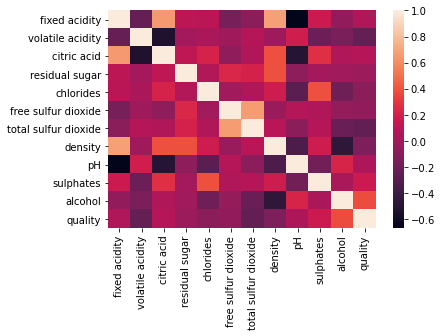

In [13]:
plt.figure(figsize=(6,4))                                  # Create a figure object with a specified figure size

sns.heatmap(data.corr())                                      # Plot Correlation Matrix as heatmap

In [7]:
from sklearn.model_selection import train_test_split            # Import train_test_split function from Scikit-Learn

In [33]:
# Convert columns of Pandas DataFrame to Numpy arrays

# Features
X = data.drop('quality',axis=1).values

# Target Variable
y = data['quality'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)         # Train-Test Split

In [35]:
import tensorflow as tf

from tensorflow.keras.models import Sequential                         # Import Sequential() to instatiate a Feed-forward NN object
from tensorflow.keras.layers import Dense                              # Import Dense() to instatiate fully-connected layer objects

In [44]:
model = Sequential()
model.add(Dense(units=11, input_dim=11, kernel_initializer='normal',activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [45]:
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test), verbose=1)

Epoch 1/250
29/29 [==============================] - 0s 6ms/step - loss: 0.8490 - accuracy: 0.4973 - val_loss: 0.7110 - val_accuracy: 0.4520
Epoch 2/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5547 - val_loss: 0.6710 - val_accuracy: 0.5808
Epoch 3/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.6089 - val_loss: 0.6608 - val_accuracy: 0.5833
Epoch 4/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6176 - val_loss: 0.6507 - val_accuracy: 0.5859
Epoch 5/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6143 - val_loss: 0.6591 - val_accuracy: 0.5833
Epoch 6/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6132 - val_loss: 0.6501 - val_accuracy: 0.5732
Epoch 7/250
29/29 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6165 - val_loss: 0.6502 - val_accuracy: 0.5682
Epoch 8/250
2

Epoch 59/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6750 - val_loss: 0.5819 - val_accuracy: 0.7020
Epoch 60/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.6923 - val_loss: 0.5818 - val_accuracy: 0.6692
Epoch 61/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6793 - val_loss: 0.5941 - val_accuracy: 0.6540
Epoch 62/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6869 - val_loss: 0.5784 - val_accuracy: 0.6667
Epoch 63/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.6847 - val_loss: 0.5817 - val_accuracy: 0.6742
Epoch 64/250
29/29 [==============================] - 0s 1ms/step - loss: 0.5935 - accuracy: 0.6826 - val_loss: 0.5904 - val_accuracy: 0.6869
Epoch 65/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.6923 - val_loss: 0.5840 - val_accuracy: 0.6717
Epoch 

29/29 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7075 - val_loss: 0.5640 - val_accuracy: 0.7273
Epoch 174/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7010 - val_loss: 0.5727 - val_accuracy: 0.6995
Epoch 175/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7270 - val_loss: 0.5540 - val_accuracy: 0.7197
Epoch 176/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7161 - val_loss: 0.5624 - val_accuracy: 0.7222
Epoch 177/250
29/29 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7183 - val_loss: 0.5596 - val_accuracy: 0.7121
Epoch 178/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7140 - val_loss: 0.5547 - val_accuracy: 0.7172
Epoch 179/250
29/29 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7140 - val_loss: 0.5594 - val_accuracy: 0.7121
Epoch 180/250

In [46]:
model_loss = pd.DataFrame(model.history.history)    # Save Training and Validation Loss in a Pandas DataFrame

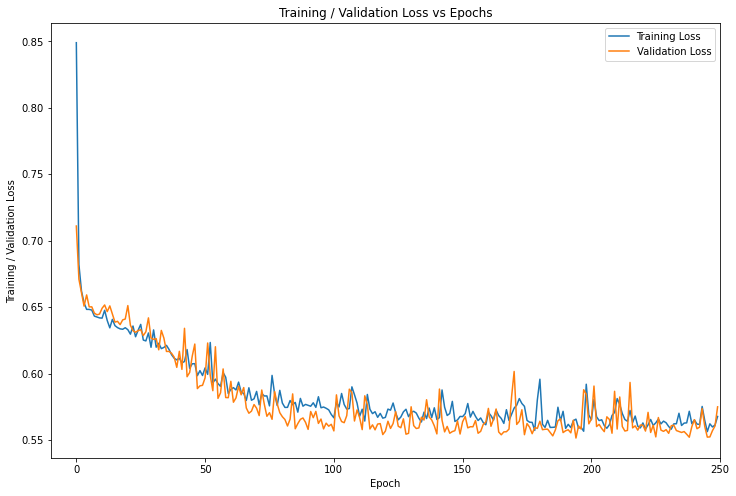

In [47]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

In [48]:
predictions = model.predict_classes(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix     

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       217
           1       0.62      0.79      0.69       179

    accuracy                           0.69       396
   macro avg       0.70      0.70      0.69       396
weighted avg       0.71      0.69      0.69       396



In [51]:
print(confusion_matrix(y_test,predictions))

[[131  86]
 [ 38 141]]


## EARLY STOPPING

In [54]:
from tensorflow.keras.callbacks import EarlyStopping                 # Import EarlyStopping method

In [60]:
model = Sequential()
model.add(Dense(units=11, input_dim=11, kernel_initializer='normal',activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [61]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)       # Define EarlyStopping object and assign it to variable "early_stop"

In [62]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])     # Fit NN model, including early stopping 

Epoch 1/400
29/29 [==============================] - 0s 6ms/step - loss: 0.6790 - accuracy: 0.5580 - val_loss: 0.6790 - val_accuracy: 0.5833
Epoch 2/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.6035 - val_loss: 0.6616 - val_accuracy: 0.5581
Epoch 3/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6089 - val_loss: 0.6618 - val_accuracy: 0.5909
Epoch 4/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6197 - val_loss: 0.6555 - val_accuracy: 0.5783
Epoch 5/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6176 - val_loss: 0.6545 - val_accuracy: 0.5758
Epoch 6/400
29/29 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.6251 - val_loss: 0.6529 - val_accuracy: 0.5783
Epoch 7/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6132 - val_loss: 0.6543 - val_accuracy: 0.5732
Epoch 8/400
2

Epoch 59/400
29/29 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6490 - val_loss: 0.6029 - val_accuracy: 0.6439
Epoch 60/400
29/29 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.6652 - val_loss: 0.6032 - val_accuracy: 0.6439
Epoch 61/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6598 - val_loss: 0.6085 - val_accuracy: 0.6818
Epoch 62/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6696 - val_loss: 0.6014 - val_accuracy: 0.6465
Epoch 63/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6631 - val_loss: 0.5998 - val_accuracy: 0.6692
Epoch 64/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.6793 - val_loss: 0.5960 - val_accuracy: 0.6540
Epoch 65/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6609 - val_loss: 0.5980 - val_accuracy: 0.6717
Epoch 

29/29 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7151 - val_loss: 0.5667 - val_accuracy: 0.6970
Epoch 174/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7031 - val_loss: 0.5641 - val_accuracy: 0.7071
Epoch 175/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7064 - val_loss: 0.5987 - val_accuracy: 0.6667
Epoch 176/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7042 - val_loss: 0.5646 - val_accuracy: 0.6995
Epoch 177/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7183 - val_loss: 0.5686 - val_accuracy: 0.7020
Epoch 178/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.6966 - val_loss: 0.5684 - val_accuracy: 0.7020
Epoch 179/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6912 - val_loss: 0.5701 - val_accuracy: 0.6894
Epoch 180/400

29/29 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7237 - val_loss: 0.5610 - val_accuracy: 0.7071
Epoch 288/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7053 - val_loss: 0.5721 - val_accuracy: 0.6894
Epoch 289/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7075 - val_loss: 0.5645 - val_accuracy: 0.7020
Epoch 290/400
29/29 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7291 - val_loss: 0.5605 - val_accuracy: 0.7071
Epoch 291/400
29/29 [==============================] - 0s 1ms/step - loss: 0.5719 - accuracy: 0.7129 - val_loss: 0.5707 - val_accuracy: 0.6944
Epoch 292/400
29/29 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7237 - val_loss: 0.5622 - val_accuracy: 0.7045
Epoch 293/400
29/29 [==============================] - 0s 1ms/step - loss: 0.5648 - accuracy: 0.7107 - val_loss: 0.5713 - val_accuracy: 0.6869
Epoch 294/400

In [63]:
model_loss = pd.DataFrame(model.history.history)           # Save Training and Validation Loss in a Pandas DataFrame 

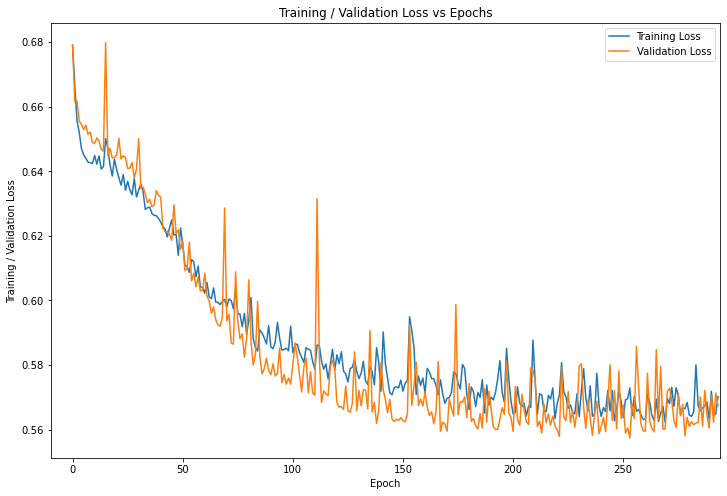

In [64]:
# Plot Training / Validation Loss vs Epochs

plt.figure(figsize = (12,8))

plt.plot(range(len(model_loss)), model_loss['loss'], label = 'Training Loss')
plt.plot(range(len(model_loss)), model_loss['val_loss'], label = 'Validation Loss')

plt.xlim([-10, len(model_loss)])
plt.xlabel('Epoch')
plt.ylabel('Training / Validation Loss')
plt.title('Training / Validation Loss vs Epochs')
plt.legend()

In [65]:
predictions = model.predict_classes(X_test) 
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       217
           1       0.70      0.56      0.63       179

    accuracy                           0.69       396
   macro avg       0.70      0.68      0.68       396
weighted avg       0.70      0.69      0.69       396

[[174  43]
 [ 78 101]]
